# Visualization With Matplotlib: Basics

*Disclaimer: The contents of this notebook are developped according to Python Data Science Handbook, by Jake VanderPlas and Python for Data Analysis, by Wes McKinney*
    
### Importing Matplotlib
Just as we use the np shorthand for NumPy and the pd shorthand for Pandas, we will use some standard shorthands for Matplotlib imports. The `plt` interface is what we will use most often, as we shall see throughout this chapter

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Setting Styles
We will use the `plt.style` directive to choose appropriate aesthetic styles for our figures. Here we will set the classic style, which ensures that the plots we create use the classic Matplotlib style

In [2]:
plt.style.use('classic')

### How to Display Your Plots
If you are using Matplotlib from within a script, the function `plt.show()` is your friend. `plt.show()` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

Plotting interactively within an Jupyter notebook can be done with the `%matplotlib` command

- `%matplotlib notebook` will lead to interactive plots embedded within the notebook
- `%matplotlib inline` will lead to static images of your plot embedded in the notebook

For this book, we will generally opt for `%matplotlib inline`

In [3]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic

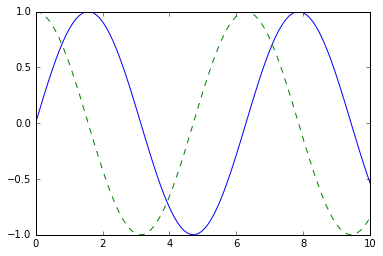

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
#plt.show()

### Saving Figures to File
One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the `savefig()` command. For example, to save the previous figure as a PNG file, you can run the command below

In [5]:
fig.savefig('my_figure.png')

We now have a file called `my_figure.png` in the current working directory

### Dual Interfaces
Matplotlib has dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface.
    
### MATLAB-style Interface
Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the pyplot (`plt`) interface

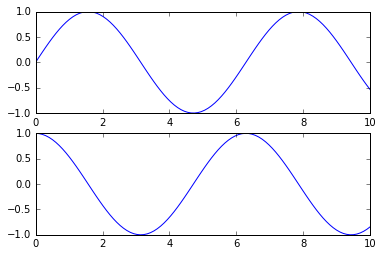

In [6]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

It is important to note that this interface is stateful: it keeps track of the "current" figure and axes, which are where all plt commands are applied. You can get a reference to these using the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first?

### Object-Oriented Interface
The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects. To re-create the previous plot using this style of plotting, you might do the following

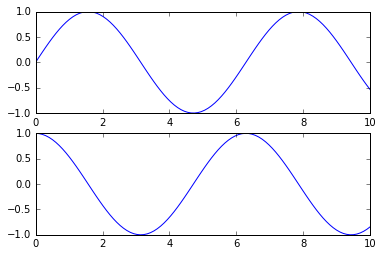

In [7]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. In most cases, the difference is as small as switching `plt.plot()` to `ax.plot()`, but there are a few gotchas that we will highlight as they come up in the following sections

### Simple Line Plots
The simplest of all plots is the visualization of a single function `y = f(x)`

In [8]:
plt.style.use('seaborn-whitegrid')

For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows

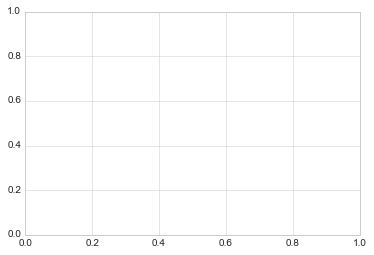

In [9]:
fig = plt.figure()
ax = plt.axes()

### The Anatomy of a Matplotlib Figure

<div>
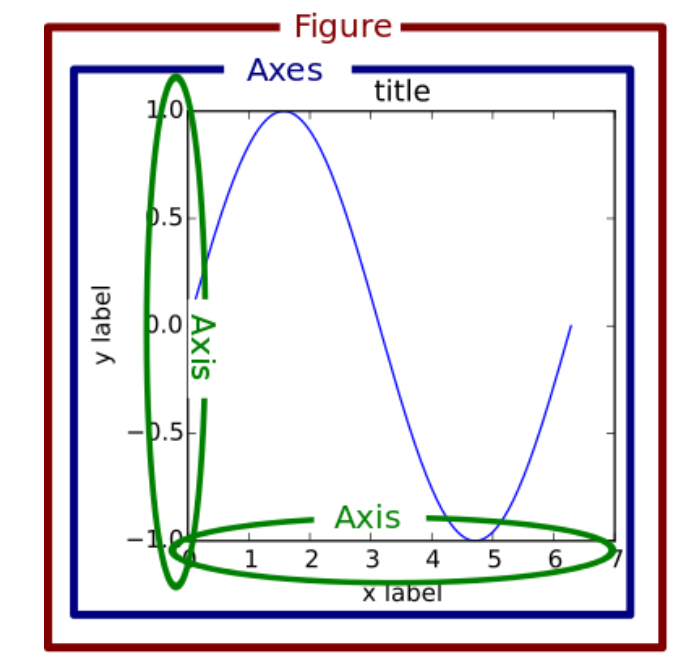
</div>

In Matplotlib, the figure (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class `plt.Axes`) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. Throughout this book, we'll commonly use the variable name fig to refer to a figure instance, and ax to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the `ax.plot` function to plot some data. Let's start with a simple sinusoid

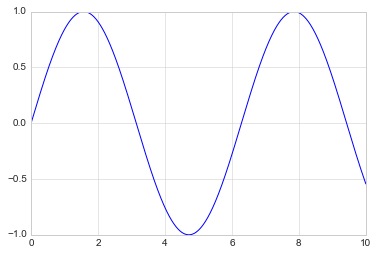

In [10]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background

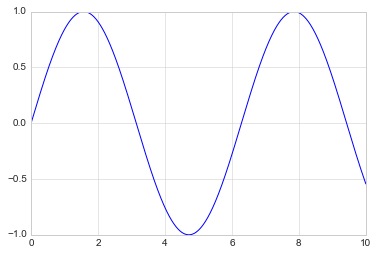

In [11]:
plt.plot(x, np.sin(x))

If we want to create a single figure with multiple lines, we can simply call the `plot` function multiple times

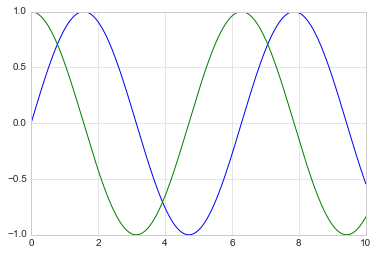

In [12]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Adjusting the Plot: Line Colors and Styles
The first adjustment you might wish to make to a plot is to control the line colors and styles. The `plt.plot()` function takes additional arguments that can be used to specify these. To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways

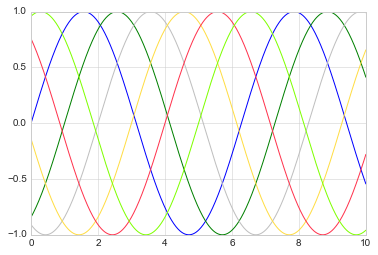

In [13]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines. Similarly, the line style can be adjusted using the `linestyle` keyword

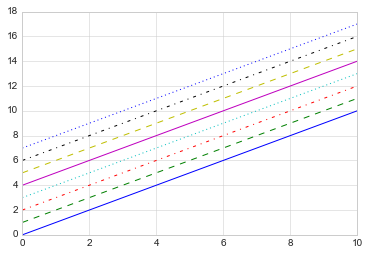

In [14]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these `linestyle` and `color` codes can be combined into a single non-keyword argument to the `plt.plot()` function

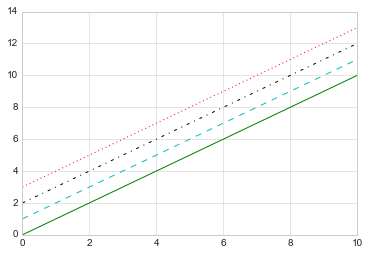

In [15]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics

### Adjusting the Plot: Axes Limits
Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control. The most basic way to adjust axis limits is to use the `plt.xlim()` and `plt.ylim()` methods

(-1.5, 1.5)

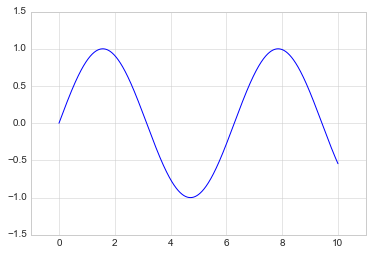

In [16]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments

(1.2, -1.2)

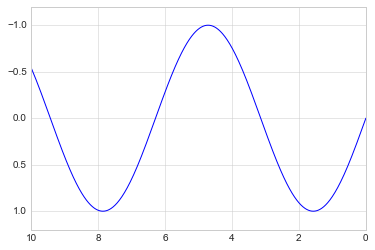

In [17]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

A useful related method is `plt.axis()` (note here the potential confusion between axes with an e, and axis with an i). The `plt.axis()` method allows you to set the x and y limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`

(-1.0, 11.0, -1.5, 1.5)

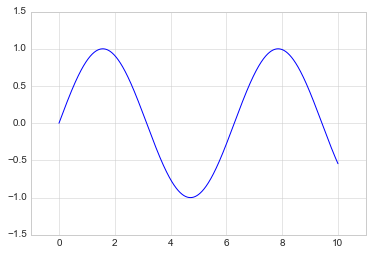

In [18]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

The `plt.axis()` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot

(0.0, 10.0, -0.9999972954811321, 0.9999996994977832)

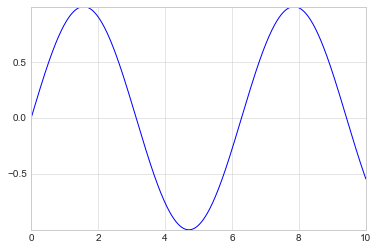

In [19]:
plt.plot(x, np.sin(x))
plt.axis('tight')

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in x is equal to one unit in y

(0.0, 10.0, -1.0, 1.0)

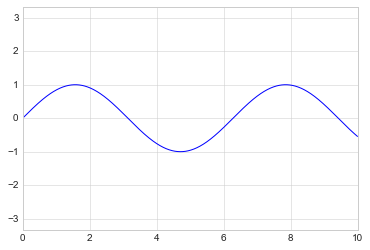

In [20]:
plt.plot(x, np.sin(x))
plt.axis('equal')

### Labeling Plots
As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends. Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them

Text(0, 0.5, 'sin(x)')

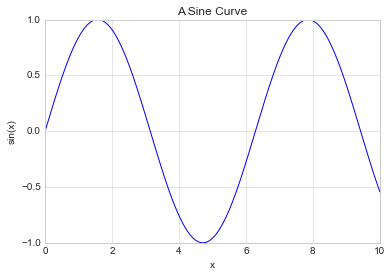

In [21]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the (you guessed it) `plt.legend()` method. Though there are several valid ways of using this, I find it easiest to specify the label of each line using the `label` keyword of the plot function

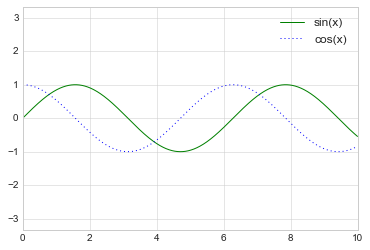

In [22]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()

As you can see, the `plt.legend()` function keeps track of the line style and color, and matches these with the correct label

While most `plt` functions translate directly to `ax` methods (such as `plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend()`, etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- `plt.xlabel()` → `ax.set_xlabel()`
- `plt.ylabel()` → `ax.set_ylabel()`
- `plt.xlim()` → `ax.set_xlim()`
- `plt.ylim()` → `ax.set_ylim()`
- `plt.title()` → `ax.set_title()`

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the `ax.set()` method to set all these properties at once

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'A Simple Plot')]

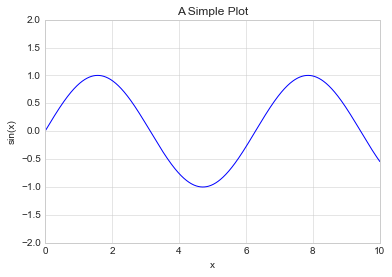

In [23]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim = (0, 10), ylim = (-2, 2),
       xlabel = 'x', ylabel = 'sin(x)',
       title = 'A Simple Plot')